In [1]:
# Importing all libraries
import numpy
from matplotlib import pyplot
from time import time
from codes.grids import regular_grid
from codes.prism import prism_tf
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [2]:
# Defines number of points
nx, ny = 50, 50
# Define the area
area = (-2000., 2000., -2000., 2000.)
shape = (nx, ny)
# Creates the grid
xobs, yobs, zobs = regular_grid(area, shape, -200.)

In [3]:
# Define the elements of the prims for gravity and magnetic computation
model1 = (-150., 150., -800., 800., 100., 400., 1.175)
# Directions
inc, dec = 65., 28. # field
i1, d1 = 45., 45.
i2, d2 = -35., -20.
i3, d3 = -3., 4

In [4]:
# Computes the total field anomaly
tf1 = prism_tf(xobs, yobs, zobs, model1, inc, dec, i1, d1)
tf2 = prism_tf(xobs, yobs, zobs, model1, inc, dec, i2, d2)
tf3 = prism_tf(xobs, yobs, zobs, model1, inc, dec, i3, d3)
tf4 = prism_tf(xobs, yobs, zobs, model1, inc, dec, inc, dec)

In [5]:
_ = analysis(tf1, 'nT')
print
_ = analysis(tf2, 'nT')
print
_ = analysis(tf3, 'nT')
print
_ = analysis(tf4, 'nT')

Minimum:    -32.4243 nT
Maximum:    88.5751 nT
Mean value: 1.3588 nT
Variation:  120.9994 nT

Minimum:    -92.1930 nT
Maximum:    24.3177 nT
Mean value: -1.7082 nT
Variation:  116.5107 nT

Minimum:    -75.9335 nT
Maximum:    49.8697 nT
Mean value: -0.6323 nT
Variation:  125.8032 nT

Minimum:    -26.5700 nT
Maximum:    100.5250 nT
Mean value: 1.9960 nT
Variation:  127.0949 nT


In [6]:
# Adding noise
tf1 = addnoise(tf1, 5., 0.15)
tf2 = addnoise(tf2, 5., 0.15)
tf3 = addnoise(tf3, 5., 0.15)
tf4 = addnoise(tf4, 5., 0.15)

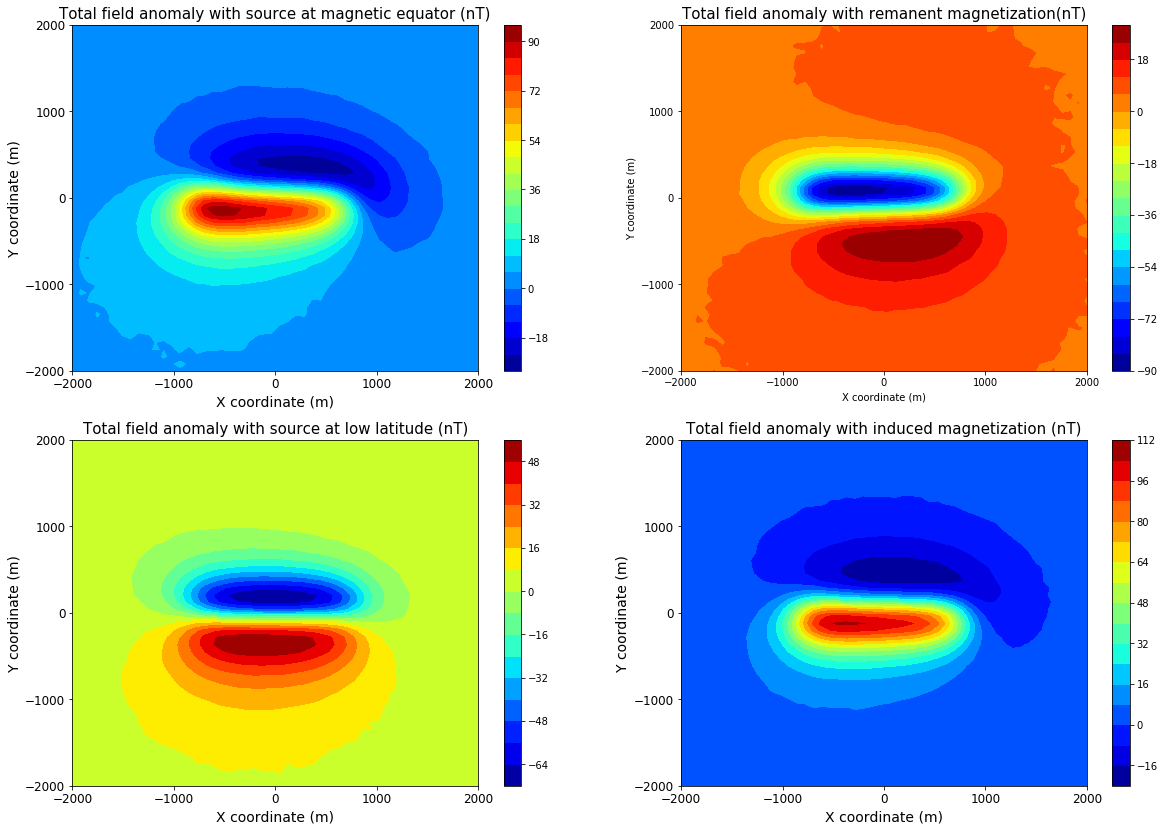

In [7]:
# Plotting the result
pyplot.figure(figsize=(20, 14))

pyplot.subplot(2,2,1)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), tf1.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Total field anomaly with source at magnetic equator (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), tf2.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Total field anomaly with remanent magnetization(nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)')
pyplot.ylabel('Y coordinate (m)')
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5))
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5))
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), tf3.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Total field anomaly with source at low latitude (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), tf4.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Total field anomaly with induced magnetization (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.savefig('figure01-alltotalfieldanomalies.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [8]:
from codes.equivalentlayer import layer, rtp_layer

In [9]:
# Layer informations
area_layer = (-2000., 2000., -2000., 2000.)
shape_layer = (15, 15)
level = 800.

In [10]:
# Create the layer
eqlayer = layer(area_layer, shape_layer, level)

In [11]:
data1 = [xobs, yobs, zobs, tf1]
data2 = [xobs, yobs, zobs, tf2]
data3 = [xobs, yobs, zobs, tf3]
data4 = [xobs, yobs, zobs, tf4]

In [12]:
# Importing filtering functions
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv
from codes.statistical import cccoef

# -

In [26]:
# Create the grid
inclination = numpy.linspace(-90., 90., 31)
declination = numpy.linspace(-180., 180., 37)

In [28]:
D, I = numpy.meshgrid(declination, inclination)

In [29]:
res1 = numpy.zeros_like(D)
res2 = numpy.zeros_like(D)
res3 = numpy.zeros_like(D)
res4 = numpy.zeros_like(D)

In [30]:
xobs = xobs.reshape(shape)
yobs = yobs.reshape(shape)
tf1 = tf1.reshape(shape)
tf2 = tf2.reshape(shape)
tf3 = tf3.reshape(shape)
tf4 = tf4.reshape(shape)

First anomaly

In [31]:
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data1, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            res1[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf1, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            res1[k1,k2] = cccoef(tga, vga)        
final = time()
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 915.826


In [32]:
# Analysing the positive coefficients
print 'Simple correlation (positive):'
_ = analysis(res1, 'no unit')

Simple correlation (positive):
Minimum:    -0.6801 no unit
Maximum:    0.6801 no unit
Mean value: -0.0020 no unit
Variation:  1.3601 no unit


In [33]:
# Search for the maximum and minimum pair of inclination and declination
imax1, jmax1 = numpy.where(res1 == res1.max())
imin1, jmin1 = numpy.where(res1 == res1.min())
incmax1 = float(I[imax1, jmax1])
decmax1 = float(D[imax1, jmax1])
incmin1 = float(I[imin1, jmin1])
decmin1 = float(D[imin1, jmin1])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', incmax1
print 'Declination:', decmax1
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', incmin1
print 'Declination:', decmin1

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: 54.0
Declination: 40.0

(I,D) for minimum coefficient:
Inclination: -54.0
Declination: -140.0


/home/nielsendelimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


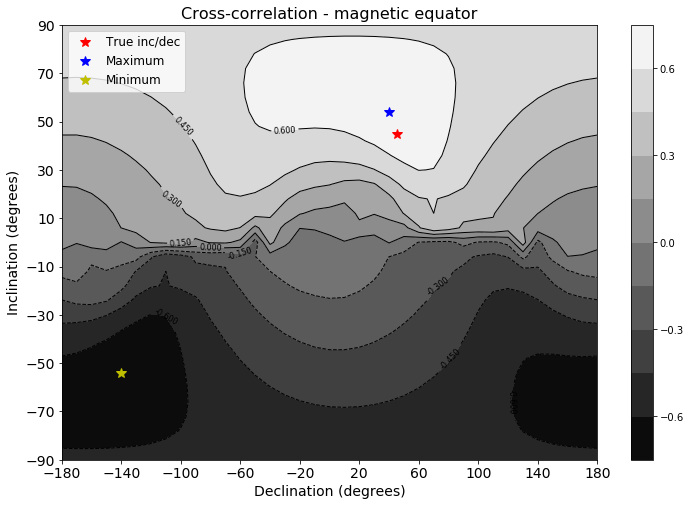

In [34]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D, I, res1, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, res1, 10, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
pyplot.rcParams['contour.negative_linestyle'] = 'solid'
pyplot.plot(d1, i1, 'r*', label = 'True inc/dec', markersize = 10)
pyplot.plot(decmax1, incmax1, 'b*', label = 'Maximum', markersize = 10)
pyplot.plot(decmin1, incmin1, 'y*', label = 'Minimum', markersize = 10)
pyplot.title('Cross-correlation - magnetic equator', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 10), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 10), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure02-correlation01.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

Second anomaly

In [35]:
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data2, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            res2[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf2, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            res2[k1,k2] = cccoef(tga, vga)        
final = time()

In [36]:
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 796.409


In [37]:
# Analysing the positive coefficients
print 'Simple correlation (positive):'
_ = analysis(res2, 'no unit')

Simple correlation (positive):
Minimum:    -0.7059 no unit
Maximum:    0.7059 no unit
Mean value: -0.0051 no unit
Variation:  1.4119 no unit


In [38]:
# Search for the maximum and minimum pair of inclination and declination
imax2, jmax2 = numpy.where(res2 == res2.max())
imin2, jmin2 = numpy.where(res2 == res2.min())
incmax2 = float(I[imax2, jmax2])
decmax2 = float(D[imax2, jmax2])
incmin2 = float(I[imin2, jmin2])
decmin2 = float(D[imin2, jmin2])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', incmax2
print 'Declination:', decmax2
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', incmin2
print 'Declination:', decmin2

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: -36.0
Declination: -10.0

(I,D) for minimum coefficient:
Inclination: 36.0
Declination: 170.0


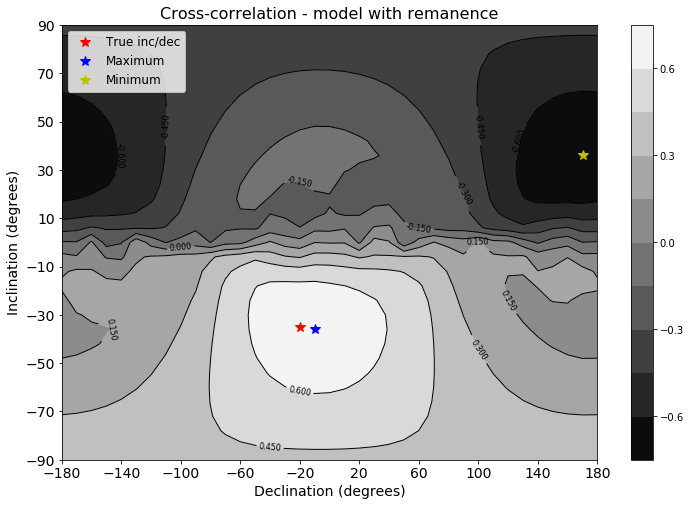

In [39]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D, I, res2, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, res2, 10, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
#pyplot.rcParams['contour.negative_linestyle'] = 'solid'
pyplot.plot(d2, i2, 'r*', label = 'True inc/dec', markersize = 10)
pyplot.plot(decmax2, incmax2, 'b*', label = 'Maximum', markersize = 10)
pyplot.plot(decmin2, incmin2, 'y*', label = 'Minimum', markersize = 10)
pyplot.title('Cross-correlation - model with remanence', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 10), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 10), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure03-correlation02.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

Third anomaly

In [40]:
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data3, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            res3[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf3, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            res3[k1,k2] = cccoef(tga, vga)        
final = time()
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 796.388


In [41]:
# Analysing the positive coefficients
print 'Simple correlation (positive):'
_ = analysis(res3, 'no unit')

Simple correlation (positive):
Minimum:    -0.6206 no unit
Maximum:    0.6206 no unit
Mean value: -0.0073 no unit
Variation:  1.2412 no unit


In [42]:
# Search for the maximum and minimum pair of inclination and declination
imax3, jmax3 = numpy.where(res3 == res3.max())
imin3, jmin3 = numpy.where(res3 == res3.min())
incmax3 = float(I[imax3, jmax3])
decmax3 = float(D[imax3, jmax3])
incmin3 = float(I[imin3, jmin3])
decmin3 = float(D[imin3, jmin3])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', incmax3
print 'Declination:', decmax3
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', incmin3
print 'Declination:', decmin3

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: -6.0
Declination: 10.0

(I,D) for minimum coefficient:
Inclination: 6.0
Declination: -170.0


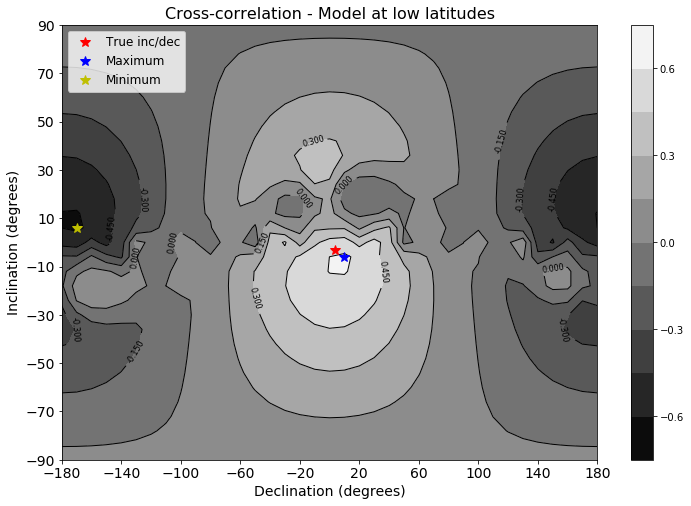

In [43]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D, I, res3, 8, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, res3, 8, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
#pyplot.rcParams['contour.negative_linestyle'] = 'solid'
pyplot.plot(d3, i3, 'r*', label = 'True inc/dec', markersize = 10)
pyplot.plot(decmax3, incmax3, 'b*', label = 'Maximum', markersize = 10)
pyplot.plot(decmin3, incmin3, 'y*', label = 'Minimum', markersize = 10)
pyplot.title('Cross-correlation - Model at low latitudes', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 10), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 10), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure04-correlation03.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

Fourth anomaly

In [44]:
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data4, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            res4[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf4, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            res4[k1,k2] = cccoef(tga, vga)        
final = time()
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 795.192


In [45]:
# Analysing the positive coefficients
print 'Simple correlation (positive):'
_ = analysis(res4, 'no unit')

Simple correlation (positive):
Minimum:    -0.6949 no unit
Maximum:    0.6949 no unit
Mean value: -0.0011 no unit
Variation:  1.3899 no unit


In [46]:
# Search for the maximum and minimum pair of inclination and declination
imax4, jmax4 = numpy.where(res4 == res4.max())
imin4, jmin4 = numpy.where(res4 == res4.min())
incmax4 = float(I[imax4, jmax4])
decmax4 = float(D[imax4, jmax4])
incmin4 = float(I[imin4, jmin4])
decmin4 = float(D[imin4, jmin4])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', incmax4
print 'Declination:', decmax4
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', incmin4
print 'Declination:', decmin4

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: 72.0
Declination: 20.0

(I,D) for minimum coefficient:
Inclination: -72.0
Declination: -160.0


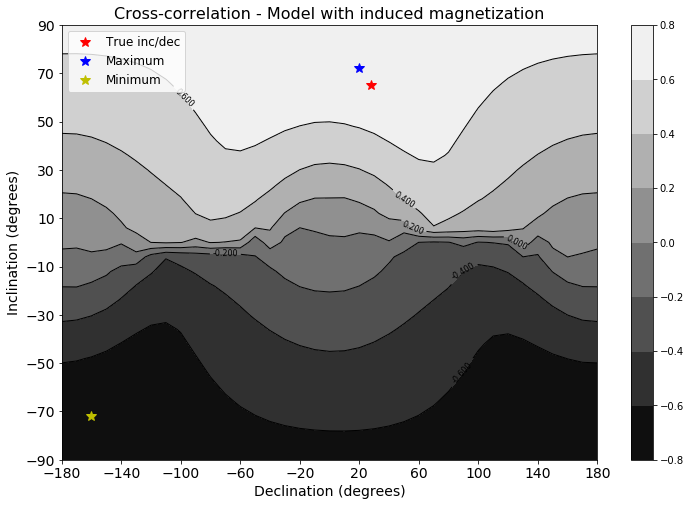

In [47]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D, I, res4, 8, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D, I, res4, 8, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
#pyplot.rcParams['contour.negative_linestyle'] = 'solid'
pyplot.plot(dec, inc, 'r*', label = 'True inc/dec', markersize = 10)
pyplot.plot(decmax4, incmax4, 'b*', label = 'Maximum', markersize = 10)
pyplot.plot(decmin4, incmin4, 'y*', label = 'Minimum', markersize = 10)
pyplot.title('Cross-correlation - Model with induced magnetization', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(numpy.linspace(D.min(), D.max(), 10), fontsize = 14)
pyplot.yticks(numpy.linspace(I.min(), I.max(), 10), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure05-correlation04.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [48]:
# Compute all reduced to Pole datasets
rtp1 = rtp_layer(data1, shape, eqlayer, shape_layer, inc, dec, incmax1, decmax1)
rtp2 = rtp_layer(data2, shape, eqlayer, shape_layer, inc, dec, incmax2, decmax2)
rtp3 = rtp_layer(data3, shape, eqlayer, shape_layer, inc, dec, incmax3, decmax3)
rtp4 = rtp_layer(data4, shape, eqlayer, shape_layer, inc, dec, incmax4, decmax4)

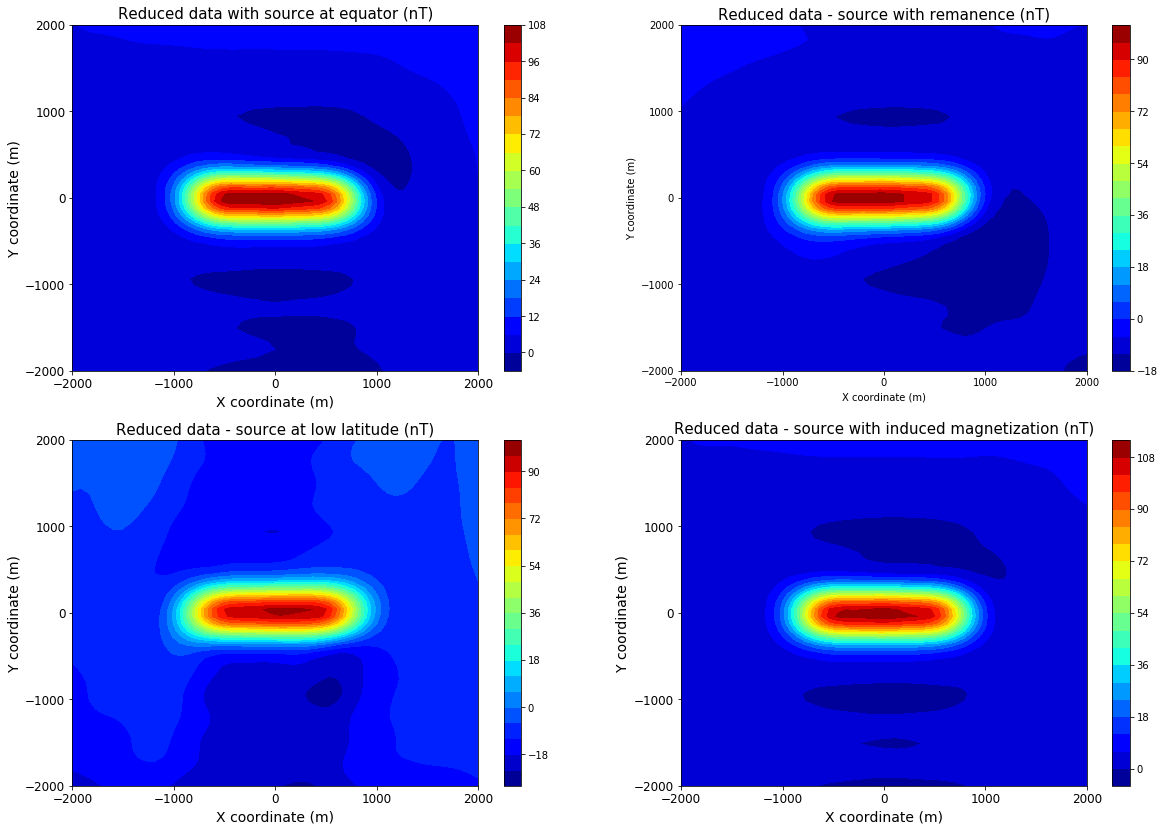

In [49]:
# Plotting the result
pyplot.figure(figsize=(20, 14))

pyplot.subplot(2,2,1)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), rtp1.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data with source at equator (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), rtp2.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data - source with remanence (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)')
pyplot.ylabel('Y coordinate (m)')
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5))
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5))
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), rtp3.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data - source at low latitude (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), rtp4.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data - source with induced magnetization (nT)', fontsize = 15)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.savefig('figure06-allreduced-anomalies.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Here we will use as example two anomalies: (i) the total field anomaly at magnetic equator and the total field anomaly at low latitude, in order to use a lower range of inclination and declination.

In [68]:
print 'Case 1: source at magnetic equator'
print 'True pair of inclination and declination: [', i1, ',', d1,']'
print 'First inclination value:', incmax1
print 'First Declination value:', decmax1

Case 1: source at magnetic equator
True pair of inclination and declination: [ 45.0 , 45.0 ]
First inclination value: 54.0
First Declination value: 40.0


In [71]:
# Define the new vectors
newinc1 = numpy.linspace(incmax1 - 15., incmax1 -5., 21)
newdec1 = numpy.linspace(decmax1 - 10., decmax1 + 10., 21)

In [73]:
# Create the new grid
D1, I1 = numpy.meshgrid(newdec1, newinc1)

In [74]:
# Zero matrix to allocate the results
Res1 = numpy.zeros_like(D1)

In [75]:
initial = time()
for k2, d in enumerate(newdec1):
    for k1, i in enumerate(newinc1):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data1, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            Res1[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf1, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            Res1[k1,k2] = cccoef(tga, vga)        
final = time()
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 350.697


In [76]:
# Analysing the positive coefficients
print 'Magnetic equator case - rearanged:'
_ = analysis(Res1, 'no unit')

Magnetic equator case - rearanged:
Minimum:    0.5893 no unit
Maximum:    0.6762 no unit
Mean value: 0.6499 no unit
Variation:  0.0869 no unit


In [77]:
# Search for the maximum and minimum pair of inclination and declination
newimax1, newjmax1 = numpy.where(Res1 == Res1.max())
newimin1, newjmin1 = numpy.where(Res1 == Res1.min())
newincmax1 = float(I1[newimax1, newjmax1])
newdecmax1 = float(D1[newimax1, newjmax1])
newincmin1 = float(I1[newimin1, newjmin1])
newdecmin1 = float(D1[newimin1, newjmin1])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', newincmax1
print 'Declination:', newdecmax1
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', newincmin1
print 'Declination:', newdecmin1

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: 49.0
Declination: 48.0

(I,D) for minimum coefficient:
Inclination: 39.0
Declination: 30.0


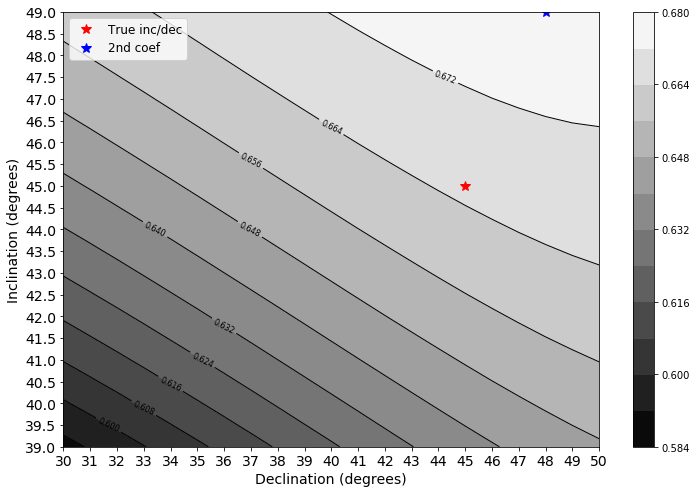

In [95]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D1, I1, Res1, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D1, I1, Res1, 10, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
pyplot.plot(d1, i1, 'r*', label = 'True inc/dec', markersize = 10)
#pyplot.plot(decmax1, incmax1, 'y*', label = '1st coef', markersize = 10)
pyplot.plot(newdecmax1, newincmax1, 'b*', label = '2nd coef', markersize = 10)
#pyplot.title('New cross-correlation - model at magnetic equator', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(newdec1, fontsize = 14)
pyplot.yticks(newinc1, fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure07-case1-newcorrelation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [96]:
print 'Case 3: source at low latitudes'
print 'True pair of inclination and declination: [', i3, ',', d3,']'
print 'First inclination value:', incmax3
print 'First Declination value:', decmax3

Case 3: source at low latitudes
True pair of inclination and declination: [ -3.0 , 4 ]
First inclination value: -6.0
First Declination value: 10.0


In [97]:
# Define the new vectors
newinc3 = numpy.linspace(incmax3 - 2., incmax3 + 8., 21)
newdec3 = numpy.linspace(decmax3 - 20., decmax3, 21)

In [98]:
# Create the new grid
D3, I3 = numpy.meshgrid(newdec3, newinc3)

In [99]:
# Zero matrix to allocate the results
Res3 = numpy.zeros_like(D3)

In [100]:
initial = time()
for k2, d in enumerate(newdec3):
    for k1, i in enumerate(newinc3):
        if i >= -10. or i <= 10.:
            rtp = rtp_layer(data3, shape, eqlayer, shape_layer, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)        
            Res3[k1,k2] = cccoef(tga, vga)
        else:
            rtp = reduction(xobs, yobs, tf3, inc, dec, i, d)
            tga = totalgrad(xobs, yobs, rtp)
            vga = zderiv(xobs, yobs, rtp)
            Res3[k1,k2] = cccoef(tga, vga)        
final = time()
print 'Cross correlation for positive range'
print 'Computation time (sec): %.3f' % (final-initial)

Cross correlation for positive range
Computation time (sec): 341.442


In [101]:
# Search for the maximum and minimum pair of inclination and declination
newimax3, newjmax3 = numpy.where(Res3 == Res3.max())
newimin3, newjmin3 = numpy.where(Res3 == Res3.min())
newincmax3 = float(I3[newimax3, newjmax3])
newdecmax3 = float(D3[newimax3, newjmax3])
newincmin3 = float(I3[newimin3, newjmin3])
newdecmin3 = float(D3[newimin3, newjmin3])
print 'Verify the computed correlation:'
print '(I,D) for maximum coefficient'
print 'Inclination:', newincmax3
print 'Declination:', newdecmax3
print
print '(I,D) for minimum coefficient:'
print 'Inclination:', newincmin3
print 'Declination:', newdecmin3

Verify the computed correlation:
(I,D) for maximum coefficient
Inclination: -5.5
Declination: 9.0

(I,D) for minimum coefficient:
Inclination: 2.0
Declination: -10.0


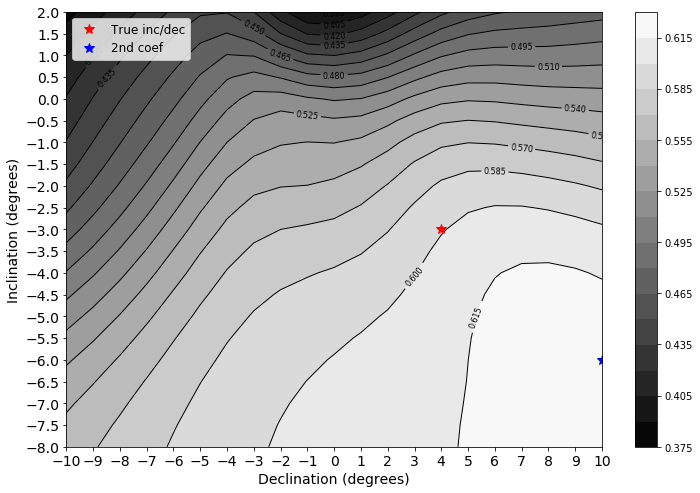

In [102]:
# Plotting the correlation results
pyplot.figure(figsize=(12, 8))
fig1 = pyplot.contour(D3, I3, Res3, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D3, I3, Res3, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig1, fontsize = 8)
pyplot.plot(d3, i3, 'r*', label = 'True inc/dec', markersize = 10)
#pyplot.plot(newdecmax3, newincmax3, 'y*', label = '1st coef', markersize = 10)
pyplot.plot(decmax3, incmax3, 'b*', label = '2nd coef', markersize = 10)
#pyplot.title('New cross-correlation - model at magnetic equator', fontsize = 16)
pyplot.xlabel('Declination (degrees)', fontsize = 14)
pyplot.ylabel('Inclination (degrees)', fontsize = 14)
pyplot.xticks(newdec3, fontsize = 14)
pyplot.yticks(newinc3, fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.savefig('figure08-case3-newcorrelation.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Here we calculate the new reduced to Pole data

In [103]:
newrtp1 = rtp_layer(data1, shape, eqlayer, shape_layer, inc, dec, newincmax1, newdecmax1)
newrtp3 = rtp_layer(data3, shape, eqlayer, shape_layer, inc, dec, newincmax3, newdecmax3)

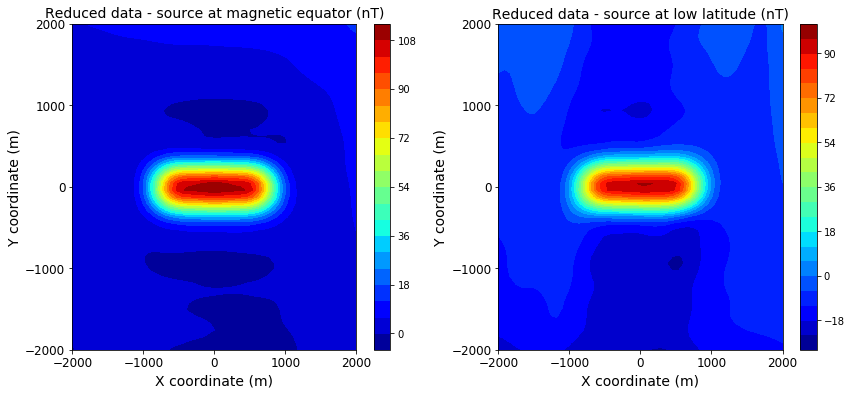

In [104]:
# Plotting the result
pyplot.figure(figsize=(14, 6))

pyplot.subplot(1, 2, 1)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), newrtp1.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data - source at magnetic equator (nT)', fontsize = 14)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(1, 2, 2)
pyplot.contourf(yobs.reshape(shape), xobs.reshape(shape), newrtp3.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.title('Reduced data - source at low latitude (nT)', fontsize = 14)
pyplot.xlabel('X coordinate (m)', fontsize = 14)
pyplot.ylabel('Y coordinate (m)', fontsize = 14)
pyplot.xticks(numpy.linspace(yobs.min(), yobs.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xobs.min(), xobs.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.savefig('figure09-newreduced-anomalies.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()